# 4th and Punt: Forgone Conclusion or Missed Opportunity?
There is nothing as sure as an NFL head coach's decision when faced with a 4th down deep in your own territory - you punt. There is nothing to think about. Anyone who knows anything about football understands the risk of failing to get enough yardage on 4th down is usually not worth the reward. It's a tale as old as time. But is it still true? I'm going to take a look at this past 2018 NFL season to put this dogmatic theory to the test. 

## The Playbook
The data was gathered from the website __[NFLsavant.com](http://www.nflsavant.com/about.php)__ I chose to only use the data for the most current season to test the larger theory of "Punt on 4th and long" on a smaller sample. But we need to first make sure that this is a large enough sample and that there wasn't some sort of yet unknown variable that changed this season's data biased in any way.

### The Plays
In one NFL season, 32 teams duke it out everyweek for 17 weeks, including each team getting a bye week where they don't play a game. So, while the regular season is 17 weeks, each team plays 16 games every year in the regular season. For this analysis, I want to look at the play-by-play data for the season year 2018. Each of the 32 teams play 16 games each, and each week 16 games take place for 16 weeks (17 weeks - 1 bye week) for a total of 256 individual games from which we will extract the plays.

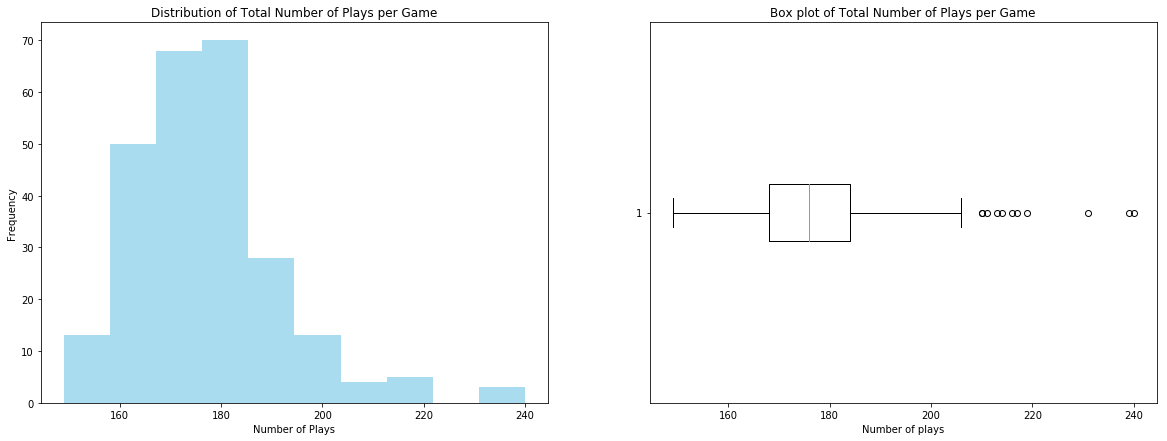

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read play-by-play data for 2014-2018 seasons and create dataframes
df18 = pd.read_csv('pbp-2018.csv')
df17 = pd.read_csv('pbp-2017.csv')
df16 = pd.read_csv('pbp-2016.csv')
df15 = pd.read_csv('pbp-2015.csv')
df14 = pd.read_csv('pbp-2014.csv')

# Create seasons dataframe list
seasons = [df14, df15, df16, df17, df18]

# Create a list of total number of plays per game for each game for the 2018 season
plays_per_game = df18.groupby('GameId').count()

plt.figure(figsize=(20,7))

# Histogram of how many plays exist in each game
plt.subplot(1, 2, 1)
plt.hist(plays_per_game['Down'], alpha=0.7, color='skyblue')
plt.title('Distribution of Total Number of Plays per Game')
plt.xlabel('Number of Plays')
plt.ylabel('Frequency')

# Boxplot of frequency of total number of plays in game
plt.subplot(1, 2, 2)
plt.boxplot(plays_per_game['Down'], vert=False)
plt.title('Box plot of Total Number of Plays per Game')
plt.xlabel('Number of plays')

plt.show()

According to the above histogram, most games have around 180 plays in it which makes sense since all games have exactly 60 minutes of play time. The outliers are most likely to be the result of games that go into overtime in which they would receive upto 10 minutes of additional playing time.

In [45]:
# Calculate mean of plays per game
avg_no_of_plays = plays_per_game['Down'].mean()
plays_per_minute = avg_no_of_plays / 60

print('For the 2018 season, each game on average had about {} plays, or about {} plays per minute.'.format(int(avg_no_of_plays), round(plays_per_minute, 2)))

For the 2018 season, each game on average had about 177 plays, or about 2.95 plays per minute.


Calculating the mean shows that, indeed, the average number of plays in each game was right around 177 plays.

### _Is this data set detailed enough?_

In [102]:
df18.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2018090600,2018-09-06,2,6,9,PHI,ATL,0,0,35,...,0,0,NaN,35,OWN,0,NaN,0,NaN,0
1,2018090600,2018-09-06,2,0,0,NaN,ATL,0,0,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2,2018090600,2018-09-06,3,0,0,NaN,ATL,0,0,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
3,2018090600,2018-09-06,4,2,19,NaN,ATL,0,0,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
4,2018090600,2018-09-06,4,1,18,NaN,ATL,0,0,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0


This is a detailed account of the season and includes the following statistics:

In [18]:
df18.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')

Looking at the columns of the dataset I can see there are a few columns that might need some additional work. A few of the columns seem to be unnamed. Additionally, it might prove helpful to sort the dataset by GameID as currently it is not. I would also need to exclude certain situations where the fourth down play is inconsequential (end of half/game) and therefore will skew the data towards failing a fourth down attempt. Otherwise, the data set does seem to have enough detail to glean the necessary data.

### _Is it a large enough sample to correctly describe the trends?_

In [19]:
df18.shape

(45016, 45)

In [37]:
fourth = df18[df18['Down'] == 4]
fourth.shape

(3764, 45)

Out of a total of 45,016 plays recorded in the 2018 season, there were a total of 3,764 fourth down plays. I think it suffices to say that this sample definitely is large enough to describe the trends. And unless NFL coaches decide they want to run option plays all day from the wishbone formation, examining the latest season, I feel, will most closely resemble the future play schemes of next season and therefore has the highest likelihood of correctly predicting the outcomes in future games.

### _How does this season compare to previous seasons?_

In [100]:
total = []
fourthdown = []

# Make a list of number of total and 4th down plays for the past 5 seasons
for season in data:
    total.append(season.shape[0])
    fourthdown.append(season[season['Down'] == 4].shape[0])

print(total)
print(fourthdown)

[45695, 46277, 45951, 45293, 45016]
[3953, 4010, 3924, 4048, 3764]


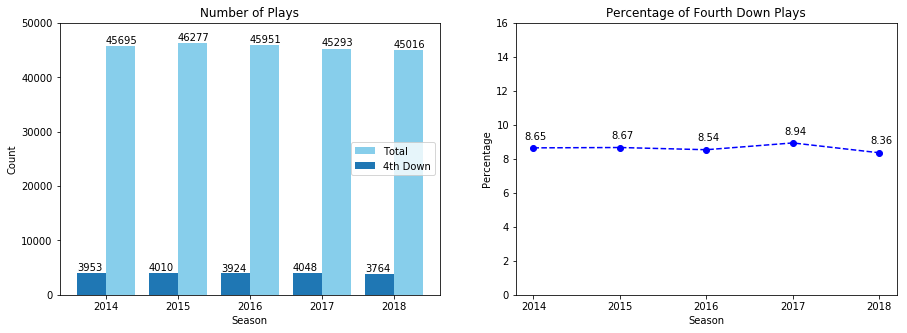

In [128]:
plt.figure(figsize=(15, 5))

# First plot compare the fourth down plays with the total number of plays for each of the past 5 seasons
ax = plt.subplot(1, 2, 1)
x_pos = np.arange(len(total))
x_name = (2014, 2015, 2016, 2017, 2018)
width = 0.4
plt.ylim(0, 50000)

rect1 = ax.bar(y_pos+width/2, total, width, color='skyblue', label='Total')
rect2 = ax.bar(y_pos-width/2, fourthdown, width, label='4th Down')

ax.set_title('Number of Plays')
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_name)
ax.legend(loc='center right')

for rect in rect1:
    height = rect.get_height()
    ax.text(rect.get_x(), height*1.01, '{}'.format(height))
    
for rect in rect2:
    height = rect.get_height()
    ax.text(rect.get_x(), height*1.1, '{}'.format(height))

# Second plot the ratio of fourth down plays to the total number of plays for each season to see if there have been 
# fluctuations and also to see if the 2018 season is anomalous at a glance.
bx = plt.subplot(1, 2, 2)

ratio = []
for i in range(len(total)):
    ratio.append(round(fourthdown[i]/total[i]*100, 2))
    
plt.plot(ratio, 'bo--')
plt.ylim(0, 16)

bx.set_title('Percentage of Fourth Down Plays')
bx.set_ylabel('Percentage')
bx.set_xlabel('Season')
bx.set_xticks(x_pos)
bx.set_xticklabels(x_name)

# Label each point in plot
for i in range(len(ratio)):
    bx.annotate(ratio[i], xy=(i-0.1, ratio[i]+0.5))

plt.show()

The ratio of fourth down plays to the total number of plays ran during a season for the last 5 seasons have largely been the same, hovering just a bit above 8 percent. 2018 season, for some reason, has seen less plays than the previous 4 seasons, but as the second plot shows, the percentage doesn't show a remarkable decrease, so using the most current data will suit just fine for the purpose of this research.

## Scouting Report
To punt or not? That isn't necessarily the question we want to answer. Rather, it would make much more sense to see in which situations going for it on 4th down, when traditionally, head coaches normally don't think it to be wise, makes a difference in increasing the chances of winning the game. Because really, winning is the only thing that truly matters despite what our parents told us when we were kids. Obviously, there is myriad of factors (such as the weather, field condition, strength of offense/defense, injuries, etc.) that contribute to the outcome of the game, so this will be a somewhat sterile look into this topic. There are a few questions I would like for the recommendation engine to answer:

1. _Will punting DECREASE the chances of the opposing team scoring?_


2. _Will NOT punting and attempting to convert on fourth down INCREASE the chances of scoring?_


3. _What is the ideal situation in which attempting to convert on fourth down is the BETTER choice?_

## The Game Plan
1. _Will punting DECREASE the chances of the opposing team scoring?_    
In order to tackle this first question, I am going to take a look at scoring drives and the distance in which the scoring team traveled. I'm going to theorize (from spending thousands of hours watching as a fan) that increasing the distance to goal does indeed decrease the chances of the team scoring. Since a punt return is a continuation of the 4th down play, the resulting field position or score will be taken into account as well.


2. _Will NOT punting and attempting to convert on fourth down INCREASE the chances of scoring?_  
Now there is two distinct outcomes when a team attempts to convert on fourth down: success or failure. I will attempt to compare the probability of scoring from the new field position and see whether there is an increase in the probability and if there is, whether the increase is large enough to warrant taking on the risk of failing. In order to truly compare the worthiness, I will need to also need to describe the chances of the opposing team scoring in the ensuing possession after a failed 4th down attempt.


3. _What is the ideal situation in which attempting to convert on fourth down is the BETTER choice?_  
Answers to questions 1 & 2 will help me narrow down the circumstances in which attempting to convert on 4th down is the better choice. Since we are only dealing with the resulting outcomes of each play, I am going to answer this question only in terms of the field position and the 'to-go' yardage.

### Overtime  
Since football isn't played on keyboard, or on a level playing field in terms of team strength, home stadium, and weather, I would need to consider additional factors that go into making decisions in real-time. I would like to develop a recommendation tool that scales with the strength of the offense versus the defense to predict the likelyhood of the attempt succeeding given the yardage left to go. I can also add another layer of complexity to recommend the best personnel and formation to maximize the probability. 